# CCD 관측 자료 전처리 (ysfitsutilpy)

* 이 노트북을 구글 코랩에서 실행하고자 한다면 [파일] - [드라이브에 사본 저장]을 하여 본인의 소유로 만든 후에 코드를 실행하거나 수정할 수 있습니다.

* 이 파일은 실제 수업에 사용하므로 필요에 따라 예고 없이 변경될 수 있습니다.

* If you have any questions or comments on this document, please email me(Kiehyun.Park@gmail.com).

* 이 파일(문서)는 공교육 현장에서 수업시간에 자유롭게 사용할 수 있으나, 다른 목적으로 사용할 시에는 사전에 연락을 주셔서 상의해 주시기 바랍니다.



천체 관측 중 CCD(charge couple device) 관측 자료를 이용하여 측광의 기본인 전처리 과정을 다룹니다.

## 필요한 환경

이 프로젝트를 위해서는 아래의 모듈이 필요합니다.

> numpy, matplotlib, ccdproc, astropy, gdown, ysfitsutilpy, version_information



### 한글 폰트 설치 (matplotlib에서 한글 폰트 깨질 경우)

구글 코랩에서 현재의 Jupyter notebook을 실행한다면 matplotlib 그래프에 한글을 사용하기 위해서 폰트를 설치해야 합니다.

아래 코드의 주석을 제거한 후에 셀을 실해 주세요. 그리고 나서 런타임 다시 시작을 해 줘야 matplotlib 그래프에서 한글을 사용할 수 있습니다.

In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

#### 런타임 다시 시작

위의 셀을 실행한 다음 반드시 다음 과정을 수행해 주세요...

* [메뉴]-[런타임]-[런터임 다시 시작]

* [메뉴]-[런타임]-[이전 셀 실행]

#### 한글 폰트 사용

위에서 한글 폰트를 설치하고, 런타임 다시시작을 했다면 구글 코랩에서 폰트 경로를 설정하여 한글 사용이 가능해 집니다.

In [ ]:
#visualization
import matplotlib as mpl
import matplotlib.pylab as pl
import matplotlib.pyplot as plt

# 브라우저에서 바로 그려지도록
%matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
# plt.rc('font', family='NanumBarunGothic')

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

### 모듈 설치 및 버전 확인

아래 셀을 실행하면 이 노트북을 실행하는데 필요한 모듈을 설치하고 파이썬 및 관련 모듈의 버전을 확인할 수 있습니다.

In [ ]:
import importlib, sys, subprocess
packages = "numpy, matplotlib, ccdproc, astropy, gdown, ysfitsutilpy, ysphotutilpy, version_information" # required modules
pkgs = packages.split(", ")
for pkg in pkgs :
    if not importlib.util.find_spec(pkg):
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', pkg, '-q'])
        print(f"**** {pkg} module is now being installed.")
    else:
        print(f"******** {pkg} module is already installed.")
%load_ext version_information
import time
now = time.strftime("%Y-%m-%d %H:%M:%S (%Z = GMT%z)")
print(f"This notebook was generated at {now} ")

vv = %version_information {packages}
for i, pkg in enumerate(vv.packages):
    print(f"{i} {pkg[0]:10s} {pkg[1]:s}")

******** numpy module is already installed.
******** matplotlib module is already installed.
******** ccdproc module is already installed.
******** astropy module is already installed.
******** gdown module is already installed.
******** ysfitsutilpy module is already installed.
******** ysphotutilpy module is already installed.
******** version_information module is already installed.
The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information
This notebook was generated at 2024-09-19 07:16:56 (UTC = GMT+0000) 
0 Python     3.10.12 64bit [GCC 11.4.0]
1 IPython    7.34.0
2 OS         Linux 6.1.85+ x86_64 with glibc2.35
3 numpy      1.26.4
4 matplotlib 3.7.1
5 ccdproc    2.4.2
6 astropy    6.1.3
7 gdown      4.7.3
8 ysfitsutilpy 0.2
9 ysphotutilpy 0.1.1
10 version_information 1.0.4


## 데이터 저장

### 데이터 저장 폴더 생성

데이터를 저장할 폴더를 "preprocessing_example" 라는 이름으로 생성해 보겠습니다.

* 만약 리눅스 시스템 이라면 shell 명령어로 가능한데, "!"를 붙이면 shell 명령어를 실행할 수 있습니다.
> !mkdir preprocessing_example

아래 코드를 실행하면 OS의 영향을 받지 않기 위하여 pathlib을 사용하여 폴더를 생성할 수 있습니다.

In [ ]:
import os
from pathlib import Path
BASEPATH = Path("./")
save_dir_name = "preprocessing_example"
print(f"BASEPATH: {BASEPATH}")

if not (BASEPATH/save_dir_name).exists():
    os.mkdir(str(BASEPATH/save_dir_name))
    print (f"{str(BASEPATH/save_dir_name)} is created...")
else :
    print (f"{str(BASEPATH/save_dir_name)} is already exist...")

BASEPATH: .
preprocessing_example is already exist...


shell 명령어로 폴더가 생성되었는지 확인해 봅니다.

폴더 생성을 확인하는 또 다른 방법은 이 창 오른쪽에서 [파일] 목록을 확인해 볼 수 있습니다.

In [ ]:
!ls -al

total 20
drwxr-xr-x 1 root root 4096 Sep 19 06:47 .
drwxr-xr-x 1 root root 4096 Sep 19 06:44 ..
drwxr-xr-x 4 root root 4096 Sep 17 13:21 .config
drwxr-xr-x 2 root root 4096 Sep 19 07:09 preprocessing_example
drwxr-xr-x 1 root root 4096 Sep 17 13:22 sample_data


### CCD 관측 데이터 다운로드

경기과학고등학교 천문대에서 CCD로 관측한 이미지 (예제 fits files)을 구글 드라이브에 저장해 놓았습니다. wget 명령을 사용하여 다음과 같이 구글 코랩 [작업 영역]에 다운로드 받아 보겠습니다.

*   bias frame : 5장
*   dark frame : 140sec 5장, 180sec 4장
*   flat frame : 5장
*   object frame : M15 60sec 5장, M35 140sec 10장

파일의 갯수가 많아서 하나의 압축파일로 저장해 놓은 것을 받아 보도록 하겠습니다.



### gdown

구글 드라이브에 저장된 파일을 wget으로 다운받는 경우 용량의 제한이 있습니다. 이를 해결할 수 있는 방법 중의 하나가 gdown을 이용하는 것입니다.

In [ ]:
fname = "preprocessing_example.zip"
fid = "1o2YV3Z_G5BIl-MtKg9ng2lTV6W3eHMmU"

# gdown을 이용(나의 구글드라이브에서 공유한 파일을 다운로드)
!gdown {fid} -O {save_dir_name}/{fname}

Downloading...
From (original): https://drive.google.com/uc?id=1o2YV3Z_G5BIl-MtKg9ng2lTV6W3eHMmU
From (redirected): https://drive.google.com/uc?id=1o2YV3Z_G5BIl-MtKg9ng2lTV6W3eHMmU&confirm=t&uuid=3ed475a6-2929-4b26-b42d-19e702ac4fed
To: /content/preprocessing_example/preprocessing_example.zip
100% 187M/187M [00:01<00:00, 133MB/s]


### 데이터 확인

* 코랩을 사용할 경우에는 오른쪽의 [파일]창에서 확인할 수 있습니다.
* linux shell 명령어로 다음과 같이 확인해 볼 수 있습니다.
> ls -l preprocessing_example

OS의 영향을 받지 않고 파이썬으로 확인하는 방법은 아래와 같이 하면 됩니다.

In [ ]:
from pathlib import Path
fpaths = sorted(list((BASEPATH/save_dir_name).glob('*.zip')))
print(f"fpaths: {fpaths}")
print(f"len(fpaths): {len(fpaths)}")

fpaths: [PosixPath('preprocessing_example/preprocessing_example.zip')]
len(fpaths): 1


### 압축 풀기


In [ ]:
import shutil

shutil.unpack_archive(str(fpaths[0]), str(BASEPATH/save_dir_name))
print(str(fpaths[0]), "is unpacked to", str(BASEPATH/save_dir_name))

preprocessing_example/preprocessing_example.zip is unpacked to preprocessing_example


In [ ]:
# from zipfile import ZipFile
# with ZipFile(str(fpaths[0]), 'r') as zip_ref:
#     zip_ref.extractall(str(BASEPATH/save_dir_name))
#     print(str(fpath[0]), "is unpacked to", str(BASEPATH/save_dir_name))

### 압축 해제된 파일 확인

shell 명령어로 파일이 생성되었는지 확인해 보자.
역시 마찬가지로 이 창 오른쪽에서 [파일] 목록을 확인해 볼 수 있습니다.

In [ ]:
fpaths = sorted(list((BASEPATH/save_dir_name).glob('*.fit*')))
print(f"fpaths: {fpaths}")
print(f"len(fpaths): {len(fpaths)}")

fpaths: [PosixPath('preprocessing_example/M15-g00001.fit'), PosixPath('preprocessing_example/M15-g00002.fit'), PosixPath('preprocessing_example/M15-g00003.fit'), PosixPath('preprocessing_example/M15-g00004.fit'), PosixPath('preprocessing_example/M15-g00005.fit'), PosixPath('preprocessing_example/M35-g3035781.fit'), PosixPath('preprocessing_example/M35-g3035782.fit'), PosixPath('preprocessing_example/M35-g3035783.fit'), PosixPath('preprocessing_example/M35-g3035784.fit'), PosixPath('preprocessing_example/M35-g3035785.fit'), PosixPath('preprocessing_example/M35-g3035786.fit'), PosixPath('preprocessing_example/M35-g3035787.fit'), PosixPath('preprocessing_example/M35-g3035788.fit'), PosixPath('preprocessing_example/M35-g3035789.fit'), PosixPath('preprocessing_example/M35-g3035790.fit'), PosixPath('preprocessing_example/bias-e-2X2-001.fit'), PosixPath('preprocessing_example/bias-e-2X2-002.fit'), PosixPath('preprocessing_example/bias-e-2X2-003.fit'), PosixPath('preprocessing_example/bias-e-2

## fits file display

### zimshow 함수

fits file을 화면에 display 할때 아래의 함수를 사용하면 매우 유용합니다.

In [ ]:
from warnings import warn
from astropy.visualization import (
    ImageNormalize,
    LinearStretch,
    ZScaleInterval,
    simple_norm,
)

def znorm(image, stretch=LinearStretch(), **kwargs):
    return ImageNormalize(image, interval=ZScaleInterval(**kwargs), stretch=stretch)

def zimshow(
    ax,
    image,
    stretch=LinearStretch(),
    cmap=None,
    origin="lower",
    zscale_kw={},
    **kwargs
):
    im = ax.imshow(
        image,
        norm=znorm(image, stretch=stretch, **zscale_kw),
        origin=origin,
        cmap=cmap,
        **kwargs
    )
    return im

def norm_imshow(
    ax,
    data,
    origin="lower",
    stretch="linear",
    power=1.0,
    asinh_a=0.1,
    min_cut=None,
    max_cut=None,
    min_percent=None,
    max_percent=None,
    percent=None,
    clip=True,
    log_a=1000,
    invalid=-1.0,
    zscale=False,
    vmin=None,
    vmax=None,
    **kwargs
):
    """Do normalization and do imshow"""
    if vmin is not None and min_cut is not None:
        warn("vmin will override min_cut.")

    if vmax is not None and max_cut is not None:
        warn("vmax will override max_cut.")

    if zscale:
        zs = ImageNormalize(data, interval=ZScaleInterval())
        min_cut = vmin = zs.vmin
        max_cut = vmax = zs.vmax

    if vmin is not None or vmax is not None:
        im = ax.imshow(data, origin=origin, vmin=vmin, vmax=vmax, **kwargs)
    else:
        im = ax.imshow(
            data,
            origin=origin,
            norm=simple_norm(
                data=data,
                stretch=stretch,
                power=power,
                asinh_a=asinh_a,
                min_cut=min_cut,
                max_cut=max_cut,
                min_percent=min_percent,
                max_percent=max_percent,
                percent=percent,
                clip=clip,
                log_a=log_a,
                invalid=invalid
            ),
            **kwargs)
    return im

### display 함수

In [ ]:
from astropy.nddata import Cutout2D
import matplotlib.patches as patches

def plot_image_with_cutouts(all_data, cutsizes=101):
    fig_set = plt.figure(figsize=(16, 8))

    def add_subplot(position, data, title):
        ax = plt.subplot2grid((2,4), position, fig=fig_set)
        im = zimshow(ax, data, origin='lower')
        ax.set_ylabel('pixels')
        ax.grid(ls=':')
        ax.set_title(title, fontsize=8)
        plt.colorbar(im, ax=ax, fraction=0.0455, pad=0.04)
        return im

    def add_rectangle(x, y, label):
        rect = patches.Rectangle((x, y), cutsizes,
                                cutsizes, linewidth=1,
                                edgecolor='r', facecolor='none')
        ax1.add_patch(rect)
        ax1.text(x, y, label)

    # 전체 이미지
    ax1 = plt.subplot2grid((2,4), (0,0), colspan=2, rowspan=2, fig=fig_set)
    im1 = zimshow(ax1, all_data, origin='lower', cmap='viridis')
    ax1.set_title('The whole image', fontsize=9)
    plt.colorbar(im1, ax=ax1, fraction=0.0455, pad=0.04)

    # 4개의 부분 이미지
    positions = [(0,2), (0,3), (1,2), (1,3)]
    corners = [(500, all_data.shape[0] - 500),
                (all_data.shape[1] - 500, all_data.shape[0] - 500),
                (500, 500),
                (all_data.shape[1] - 500, 500),
                ]

    for i, (pos, corner) in enumerate(zip(positions, corners), 1):
        cut_hdu = Cutout2D(data=all_data, position=corner, size=(cutsizes, cutsizes))
        add_subplot(pos, cut_hdu.data, f'{i}/4 image area')
        add_rectangle(corner[0], corner[1], f"{i}/4")

    plt.tight_layout()
    plt.show()

# 함수 사용 예
# plot_image_with_cutouts(bias.data)

## ysfitsutilpy

In [ ]:
import ysfitsutilpy as yfu

help(yfu)

Help on package ysfitsutilpy:

NAME
    ysfitsutilpy

PACKAGE CONTENTS
    airmass
    astroim
    astrometry
    combutil
    filemgmt
    fitting
    hduutil
    imutil (package)
    misc
    preproc
    tests (package)

SUBMODULES
    docstrings
    imsmooth
    util_comb
    util_lmedian
    util_reject

FUNCTIONS
    warn(message, category=None, stacklevel=1, source=None)
        Issue a warning, or maybe ignore it or raise an exception.

DATA
    ASTROPY_CCD_TYPES = (<class 'astropy.nddata.ccddata.CCDData'>, <class ...
    LACOSMIC_CRREJ = {'cleantype': 'medmask', 'fs': 'median', 'inbkg': Non...
    LACOSMIC_KEYS = {'cleantype': 'medmask', 'fsmode': 'median', 'inbkg': ...
    MEDCOMB_KEYS_FLT32 = {'combine_method': 'median', 'combine_uncertainty...
    MEDCOMB_KEYS_INT = {'combine_method': 'median', 'combine_uncertainty_f...
    SUMCOMB_KEYS_INT = {'combine_method': 'sum', 'combine_uncertainty_func...
    __warningregistry__ = {'version': 265}

FILE
    /usr/local/lib/python3.10/

### make fits file summary

In [ ]:
import ysfitsutilpy as yfu

summary = yfu.make_summary(BASEPATH/save_dir_name/"*.fit*",
                           verbose = False,
                           )
if summary is not None :
    print("len(summary):", len(summary))
    print("tyep(summary):", type(summary))
    print("summary:", summary)
    #print(summary["file"][0])

DELMAG   =   0.0000            /Veriable - Comparison,   Delmag                  [astropy.io.fits.card]
DELMAG   =   0.0000            /Veriable - Comparison,   Delmag                 


len(summary): 99
tyep(summary): <class 'pandas.core.frame.DataFrame'>
summary:                                                  file  filesize  SIMPLE  \
0                preprocessing_example/M15-g00001.fit   8395200    True   
1                preprocessing_example/M15-g00002.fit   8395200    True   
2                preprocessing_example/M15-g00003.fit   8395200    True   
3                preprocessing_example/M15-g00004.fit   8395200    True   
4                preprocessing_example/M15-g00005.fit   8395200    True   
..                                                ...       ...     ...   
94  preprocessing_example/reduce_reduce_darksc_M35...  16787520    True   
95  preprocessing_example/reduce_reduce_darksc_M35...  16787520    True   
96  preprocessing_example/reduce_reduce_darksc_M35...  16787520    True   
97  preprocessing_example/reduce_reduce_darksc_M35...  16787520    True   
98  preprocessing_example/reduce_reduce_darksc_M35...  16787520    True   

    BITPIX  NAXIS  N

### BIAS


In [ ]:
bias_fits = summary.loc[summary["IMAGETYP"] == "BIAS"].copy()
bias_fits.reset_index(inplace=True)
bias_fits = bias_fits["file"]
print(type(bias_fits))
print(len(bias_fits))
print(bias_fits)

bias_comb = yfu.group_combine(
                bias_fits.tolist(),
                type_key = ["IMAGETYP"],
                type_val = ["BIAS"],
                group_key = ["EXPTIME"],
                fmt = "master_bias.fits",  # output file name format
                outdir = BASEPATH/save_dir_name,  # output directory (will automatically be made if not exist)
                combine = "med",
                memlimit = 2.e+10,
                verbose = True,
            )

<class 'pandas.core.series.Series'>
6
0    preprocessing_example/bias-e-2X2-001.fit
1    preprocessing_example/bias-e-2X2-002.fit
2    preprocessing_example/bias-e-2X2-003.fit
3    preprocessing_example/bias-e-2X2-004.fit
4    preprocessing_example/bias-e-2X2-005.fit
5      preprocessing_example/master_bias.fits
Name: file, dtype: object
Group and combine by ['EXPTIME'] (total 1 groups)
* 0.0... (6 files)


	preprocessing_example/master_bias.fits will be overridden.
..................................(dt = 1.363 s) 2024-09-19T07:17:10.480


#### display master bias

In [ ]:
# 함수 사용 예
hdul = fits.open(BASEPATH/save_dir_name/"master_bias.fits")

plot_image_with_cutouts(hdul[0].data)

Output hidden; open in https://colab.research.google.com to view.

### DARK

In [ ]:
dark_fits = summary.loc[summary["IMAGETYP"] == "DARK"].copy()
dark_fits.reset_index(inplace=True)
dark_fits = dark_fits["file"]
print(type(dark_fits))
print(len(dark_fits))
print(dark_fits)

# Say dark frames have header OBJECT = "calib" && "IMAGE-TYP" = "DARK"
dark_comb = yfu.group_combine(
                dark_fits.tolist(),
                type_key = ["IMAGETYP"],
                type_val = ["DARK"],
                group_key = ["EXPTIME"],
                fmt = "master_dark_{:.0f}sec.fits",  # output file name format
                outdir = BASEPATH/save_dir_name,  # output directory (will automatically be made if not exist)
                combine = "med",
                memlimit = 2.e+10,
                verbose = True,
            )

<class 'pandas.core.series.Series'>
11
0     preprocessing_example/dark-e-2X2-140sec-011.fit
1     preprocessing_example/dark-e-2X2-140sec-012.fit
2     preprocessing_example/dark-e-2X2-140sec-013.fit
3     preprocessing_example/dark-e-2X2-140sec-014.fit
4     preprocessing_example/dark-e-2X2-140sec-015.fit
5     preprocessing_example/dark-e-2X2-180sec-016.fit
6     preprocessing_example/dark-e-2X2-180sec-017.fit
7     preprocessing_example/dark-e-2X2-180sec-018.fit
8     preprocessing_example/dark-e-2X2-180sec-019.fit
9       preprocessing_example/master_dark_140sec.fits
10      preprocessing_example/master_dark_180sec.fits
Name: file, dtype: object
Group and combine by ['EXPTIME'] (total 2 groups)
* 140.0... (6 files)


	preprocessing_example/master_dark_140sec.fits will be overridden.
* 180.0... (5 files)


	preprocessing_example/master_dark_180sec.fits will be overridden.
..................................(dt = 2.124 s) 2024-09-19T07:17:16.897


#### display master dark

In [ ]:
# 함수 사용 예
hdul = fits.open(BASEPATH/save_dir_name/"master_dark_180sec.fits")

plot_image_with_cutouts(hdul[0].data)

Output hidden; open in https://colab.research.google.com to view.

### FLAT

In [ ]:
flat_fits = summary.loc[summary["IMAGETYP"] == "FLAT"].copy()
flat_fits.reset_index(inplace=True)
flat_fits = flat_fits["file"]
print(type(flat_fits))
print(len(flat_fits))
print(flat_fits)

flat_comb_norm = yfu.group_combine(
                flat_fits.tolist(),
                type_key = ["IMAGETYP"],
                type_val = ["FLAT"],
                group_key = ["FILTER"],
                fmt = "master_flat_{:s}_norm.fits",  # output file name format
                scale="med_sc", #norm
                scale_to_0th=False, #norm
                outdir = BASEPATH/save_dir_name,  # output directory (will automatically be made if not exist)
                combine = "med",
                memlimit = 2.e+10,
                verbose=True,
            )

flat_comb = yfu.group_combine(
                flat_fits.tolist(),
                type_key = ["IMAGETYP"],
                type_val = ["FLAT"],
                group_key = ["FILTER"],
                fmt = "master_flat_{:s}.fits",  # output file name format
                #scale="med_sc", #norm
                #scale_to_0th=False, #norm
                outdir = BASEPATH/save_dir_name,  # output directory (will automatically be made if not exist)
                combine = "med",
                memlimit = 2.e+10,
                verbose=True,
            )

<class 'pandas.core.series.Series'>
7
0        preprocessing_example/flatV-e-2X2-021.fit
1        preprocessing_example/flatV-e-2X2-022.fit
2        preprocessing_example/flatV-e-2X2-023.fit
3        preprocessing_example/flatV-e-2X2-024.fit
4        preprocessing_example/flatV-e-2X2-025.fit
5         preprocessing_example/master_flat_V.fits
6    preprocessing_example/master_flat_V_norm.fits
Name: file, dtype: object
Group and combine by ['FILTER'] (total 1 groups)
* V... (7 files)


	preprocessing_example/master_flat_V_norm.fits will be overridden.
..................................(dt = 4.974 s) 2024-09-19T07:17:25.953
Group and combine by ['FILTER'] (total 1 groups)
* V... (7 files)


	preprocessing_example/master_flat_V.fits will be overridden.
..................................(dt = 1.261 s) 2024-09-19T07:17:27.217


#### display master flat

In [ ]:
# 함수 사용 예
hdul = fits.open(BASEPATH/save_dir_name/"master_flat_V.fits")

plot_image_with_cutouts(hdul[0].data)

Output hidden; open in https://colab.research.google.com to view.

#### display master flat norm

In [ ]:
# 함수 사용 예
hdul = fits.open(BASEPATH/save_dir_name/"master_flat_V_norm.fits")

plot_image_with_cutouts(hdul[0].data)

Output hidden; open in https://colab.research.google.com to view.

### Reducing Object Images


In [ ]:
help(yfu.ccdred)

Help on function ccdred in module ysfitsutilpy.preproc:

ccdred(ccd, output=None, extension=None, mbiaspath=None, mdarkpath=None, mflatpath=None, mfrinpath=None, mbias=None, mdark=None, mflat=None, mfrin=None, fringe_flat_fielded=True, fringe_scale=None, fringe_scale_region=None, fringe_scale_kw={}, trimsec=None, gain=1, gain_key='GAIN', gain_unit=Unit("electron / adu"), rdnoise=0, rdnoise_key='RDNOISE', rdnoise_unit=Unit("electron"), exptime_key='EXPTIME', exptime_frin=None, exptime_dark=None, exptime_data=None, dark_scale=False, flat_mask=0, flat_fill=1, flat_norm_value=1, do_crrej=False, crrej_kwargs={'sigclip': 4.5, 'sigfrac': 0.5, 'objlim': 1.0, 'satlevel': inf, 'invar': None, 'inbkg': None, 'niter': 4, 'sepmed': False, 'cleantype': 'medmask', 'fs': 'median', 'psffwhm': 2.5, 'psfsize': 7, 'psfbeta': 4.765}, propagate_crmask=False, verbose_crrej=False, verbose_bdf=1, output_verify='fix', overwrite=True, dtype='float32')
    # TODO: add overscan



#### file list

In [ ]:
df_light = summary.loc[summary["IMAGETYP"] == "LIGHT"].copy()
df_light_m35 = df_light.loc[df_light["OBJECT"] == "m35_677"].copy()
df_light_m35 = df_light_m35.reset_index(drop=True)
print("df_light_m35:", df_light_m35)

df_light_m35:                                                  file  filesize  SIMPLE  \
0              preprocessing_example/M35-g3035781.fit   8559360    True   
1              preprocessing_example/M35-g3035782.fit   8559360    True   
2              preprocessing_example/M35-g3035783.fit   8559360    True   
3              preprocessing_example/M35-g3035784.fit   8559360    True   
4              preprocessing_example/M35-g3035785.fit   8559360    True   
..                                                ...       ...     ...   
65  preprocessing_example/reduce_reduce_darksc_M35...  16787520    True   
66  preprocessing_example/reduce_reduce_darksc_M35...  16787520    True   
67  preprocessing_example/reduce_reduce_darksc_M35...  16787520    True   
68  preprocessing_example/reduce_reduce_darksc_M35...  16787520    True   
69  preprocessing_example/reduce_reduce_darksc_M35...  16787520    True   

    BITPIX  NAXIS  NAXIS1  NAXIS2  BSCALE    BZERO OBSERVAT  ... TELESCOP  \
0       

#### No dark scale

In [ ]:
for _, row in df_light_m35.iterrows():

    fpath = Path(row["file"])
    ccd = yfu.load_ccd(fpath)
    filt = ccd.header["FILTER"]
    expt = ccd.header["EXPTIME"]
    red = yfu.ccdred(
        ccd,
        output = BASEPATH /save_dir_name/ f"reduce_{fpath.name}",
        mbiaspath = BASEPATH / save_dir_name / "master_bias.fits",
        mdarkpath = BASEPATH / save_dir_name / f"master_dark_{expt:.0f}sec.fits",
        mflatpath = BASEPATH / save_dir_name / f"master_flat_{filt.upper()}_norm.fits",
        dark_scale = False,  # default False
        # flat_norm_value=1,  # 1 = skip normalization, None = normalize by mean
        overwrite=True
        )

HISTORY  [yfu.biascor] Bias subtracted (BIASFRM = preprocessing_example/master_bias.fits)
HISTORY  ..................................(dt = 0.015 s) 2024-09-19T07:17:36.161
HISTORY  [yfu.darkcor] Dark subtracted (DARKFRM = preprocessing_example/master_dark_140sec.fits)
HISTORY  ..................................(dt = 0.013 s) 2024-09-19T07:17:36.180
HISTORY  [yfu.flatcor] Flat pixels with `value < flat_mask = 0` are replaced by `flat_fill = 1`.
HISTORY  .................................................2024-09-19T07:17:36.197
HISTORY  [yfu.flatcor] Flat corrected (FLATFRM = preprocessing_example/master_flat_V_norm.fits)
HISTORY  ..................................(dt = 0.024 s) 2024-09-19T07:17:36.209
Writing FITS to preprocessing_example/reduce_M35-g3035781.fit... Saved.
HISTORY  [yfu.biascor] Bias subtracted (BIASFRM = preprocessing_example/master_bias.fits)
HISTORY  ..................................(dt = 0.014 s) 2024-09-19T07:17:36.454
HISTORY  [yfu.darkcor] Dark subtracted (DARKFRM 

#### Dark scale

In [ ]:
for _, row in df_light_m35.iterrows():

    fpath = Path(row["file"])
    ccd = yfu.load_ccd(fpath)
    filt = ccd.header["FILTER"]
    expt = ccd.header["EXPTIME"]

    red = yfu.ccdred(
        ccd,
        output = BASEPATH / save_dir_name/ f"reduce_darksc_{fpath.name}",
        mbiaspath = BASEPATH /save_dir_name / "master_bias.fits",
        mdarkpath = BASEPATH / save_dir_name / f"master_dark_180sec.fits",
        mflatpath = BASEPATH / save_dir_name / f"master_flat_{filt.upper()}_norm.fits",
        dark_scale = True,
        exptime_dark = 180,
        # flat_norm_value=1,  # 1 = skip normalization, None = normalize by mean
        overwrite=True,
        )

HISTORY  [yfu.biascor] Bias subtracted (BIASFRM = preprocessing_example/master_bias.fits)
HISTORY  ..................................(dt = 0.023 s) 2024-09-19T07:17:54.116
HISTORY  [yfu.darkcor] Dark scaled by exptime: (t_data/t_dark) = (140.000/180.000) = 0.778
HISTORY  .................................................2024-09-19T07:17:54.137
HISTORY  [yfu.darkcor] Dark subtracted (DARKFRM = preprocessing_example/master_dark_180sec.fits)
HISTORY  ..................................(dt = 0.023 s) 2024-09-19T07:17:54.146
HISTORY  [yfu.flatcor] Flat pixels with `value < flat_mask = 0` are replaced by `flat_fill = 1`.
HISTORY  .................................................2024-09-19T07:17:54.161
HISTORY  [yfu.flatcor] Flat corrected (FLATFRM = preprocessing_example/master_flat_V_norm.fits)
HISTORY  ..................................(dt = 0.022 s) 2024-09-19T07:17:54.172
Writing FITS to preprocessing_example/reduce_darksc_M35-g3035781.fit... Saved.
HISTORY  [yfu.biascor] Bias subtracted (

## 확인

전처리한 결과를 비교해 보겠습니다.


### 전처리 전

In [ ]:
# 함수 사용 예
from astropy.io import fits
fpath = Path(df_light_m35['file'][0])
hdul = fits.open(fpath)

plot_image_with_cutouts(hdul[0].data)

Output hidden; open in https://colab.research.google.com to view.

### 전처리 (No dark scale)

In [ ]:
# 함수 사용 예
from astropy.io import fits
fpath = Path(df_light_m35['file'][0])
hdul = fits.open(fpath.parent/f"reduce_{fpath.name}")

plot_image_with_cutouts(hdul[0].data)

Output hidden; open in https://colab.research.google.com to view.

### 전처리 (Dark scale)

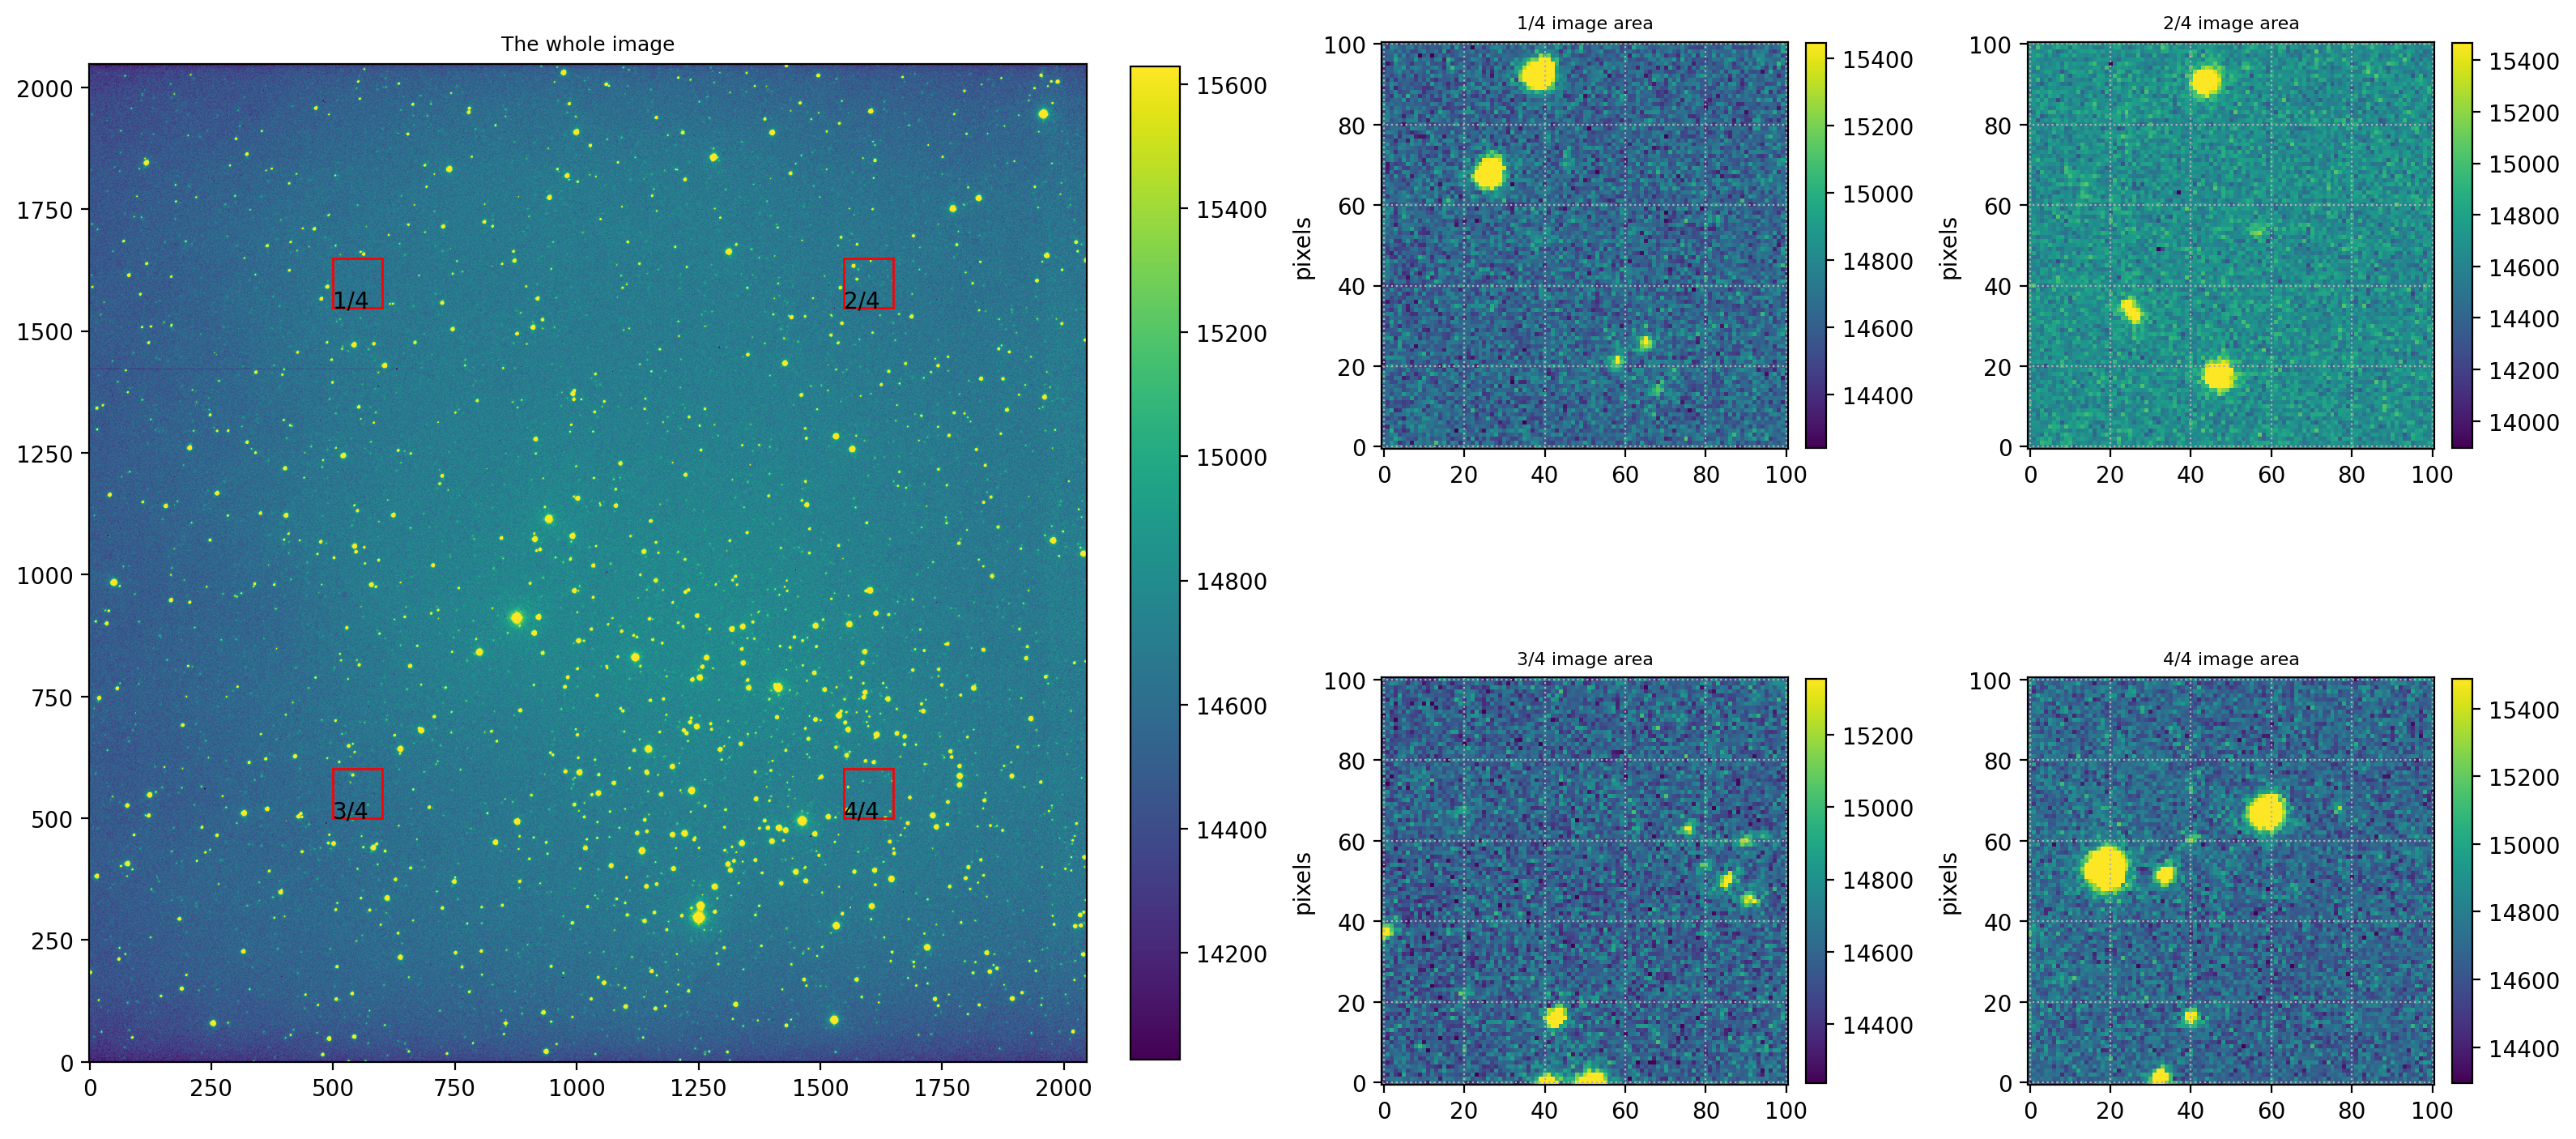

In [ ]:
# 함수 사용 예
fpath = Path(df_light_m35['file'][0])
hdul = fits.open(fpath.parent/f"reduce_darksc_{fpath.name}")

plot_image_with_cutouts(hdul[0].data)

##(과제)

1. M15를 관측한 5개의 파일 모두를 전처리를 수행하시오. (dark scale을 적용해야 함)

In [ ]:
# (과제) 아래에 코딩을 완성하여 제출하시오.

df_light = summary.loc[summary["IMAGETYP"] == "LIGHT"].copy()
df_light_m15 = df_light.loc[df_light["OBJECT"] == "M15"].copy()
df_light_m15 = df_light_m15.reset_index(drop=True)
print("df_light_m15:", df_light_m15)




df_light_m15:                                    file  filesize  SIMPLE  BITPIX  NAXIS  \
0  preprocessing_example/M15-g00001.fit   8395200    True      16      2   
1  preprocessing_example/M15-g00002.fit   8395200    True      16      2   
2  preprocessing_example/M15-g00003.fit   8395200    True      16      2   
3  preprocessing_example/M15-g00004.fit   8395200    True      16      2   
4  preprocessing_example/M15-g00005.fit   8395200    True      16      2   

   NAXIS1  NAXIS2  BSCALE    BZERO OBSERVAT  ... TELESCOP XBINNING YBINNING  \
0    2048    2048     1.0  32768.0     GSHS  ...        -      2.0      2.0   
1    2048    2048     1.0  32768.0     GSHS  ...        -      2.0      2.0   
2    2048    2048     1.0  32768.0     GSHS  ...        -      2.0      2.0   
3    2048    2048     1.0  32768.0     GSHS  ...        -      2.0      2.0   
4    2048    2048     1.0  32768.0     GSHS  ...        -      2.0      2.0   

  EXPOSURE TELESCOPE APATURE FLIPSTAT  XPIXSZ  YPIXSZ 

##(과제)

2. 그리고 전처리된 M15 5개의 파일을 모두 display 하시오.

In [ ]:
# (과제) 아래에 코딩을 완성하여 제출하시오.




